# Linear Regression using Normal Equation

# Ice Cream Revenue vs Temperature

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing data
data = pd.read_csv('./data/IceCreamData.csv')
data

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


Text(0, 0.5, 'Revenue')

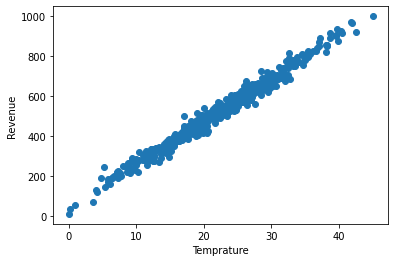

In [3]:
#Plotting the two variables
plt.scatter(data.Temperature, data.Revenue)
plt.xlabel('Temprature')
plt.ylabel('Revenue')

In [4]:
#Spliting the data into two variables for validation
train = data[:250]
test = data[250:]
print("Train: ", train.size)
print("Test : ", test.size)

Train:  500
Test :  500


Text(0, 0.5, 'Revenue')

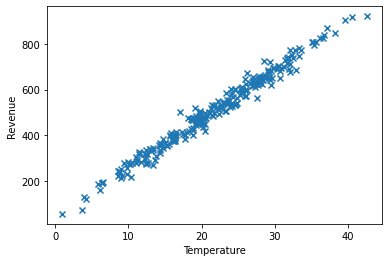

In [5]:
#Plotting the train dataset variables
plt.scatter(train.Temperature, train.Revenue, marker='x')
plt.xlabel('Temperature')
plt.ylabel('Revenue')

In [6]:
#Using normal equation to find the value of theta
x=train.Temperature
y=train.Revenue
x=np.c_[np.ones((250,1)), x]
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [7]:
theta

array([44.44011041, 21.41547709])

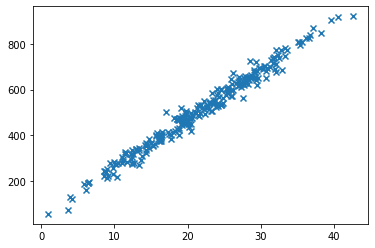

In [8]:
x=train.Temperature
plt.scatter(x,y, marker='x')

In [9]:
test.head()

,Temperature,Revenue
250,18.578119,427.138369
251,32.334808,747.963270
252,7.561125,212.483559
253,31.471224,691.516541
254,28.335363,632.901914


In [10]:
#Using theta value that we calculated earlier to predict data from test set
x_new = np.array([[18.578119],[32.334808]]) #Here we used the first two elements from test set above
x_new = np.c_[np.ones((2,1)), x_new]
x_predict = x_new.dot(theta)
x_predict

array([442.29939228, 736.90545044])

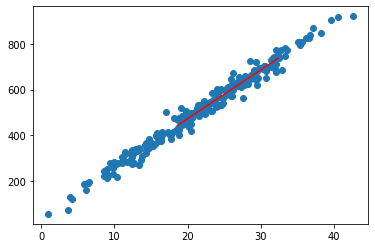

In [11]:
#Plotting the linear line that our model used for prediction
plt.plot(np.array([[18.578119],[32.334808]]), x_predict, 'r-')
plt.scatter(x,y)

In [12]:
#Predicting the entire test set
x_new = np.array(test.Temperature)
x_new = np.c_[np.ones((250,1)), x_new]
x_predict = x_new.dot(theta)
predict = pd.DataFrame(x_predict)
true = pd.DataFrame(test.Revenue)

In [13]:
#Calculation r2 score using r2_score from sklearn
from sklearn.metrics import r2_score
score = r2_score(true, predict)
print("R2 Score: ", score)

R2 Score:  0.978936444541632
